In [1]:
using DataFrames, DelimitedFiles
using Plots, HypothesisTests, Statistics, LaTeXStrings
using Tables, NamedArrays

dir_rtdos = "/home/pbarletta/labo/ANA_benchmarks/rtdos_log"
dir_1prn = "/home/pbarletta/labo/ANA_benchmarks/1prn"
frame_cnt = 600

600

## 1prn

In [2]:
# MDpocket
mdp_prn_vol = readdlm(joinpath(dir_1prn, "mdpocket/mdpout_descriptors.txt"),
    header=true)[1][:, 1:2][:, 2]
# For some reason MD pocket gives output for 599 frames, instead of 600
push!(mdp_prn_vol, mdp_prn_vol[end])

# POVME
pov_prn_vol = convert(Array{Float64, 2}, 
    readdlm(joinpath(dir_1prn, "povme/output/POVME_output.txt"))[(end-600):end-1, [1, 3]])
pov_prn_vol = pov_prn_vol[:, 2]

# Epock
epo_prn_vol = readdlm(joinpath(dir_1prn, "epock/volume.dat"), header = true)[1][:, 2]

# ANA
loprec_ana_prn_vol = convert(Array{Float64, 1},
    readdlm(joinpath(dir_1prn, "ana/volumen_loprec"))[:, 3]);
hiprec_ana_prn_vol = convert(Array{Float64, 1},
    readdlm(joinpath(dir_1prn, "ana/volumen_hiprec"))[:, 3]);

## Correlations

In [3]:
lo_pov = round(cor(loprec_ana_prn_vol, pov_prn_vol), digits = 2)
lo_epo = round(cor(loprec_ana_prn_vol, epo_prn_vol), digits = 2)
lo_mdp = round(cor(loprec_ana_prn_vol, mdp_prn_vol), digits = 2)
hi_pov = round(cor(hiprec_ana_prn_vol, pov_prn_vol), digits = 2)
hi_epo = round(cor(hiprec_ana_prn_vol, epo_prn_vol), digits = 2)
hi_mdp = round(cor(hiprec_ana_prn_vol, mdp_prn_vol), digits = 2)


NamedArray(vcat(hcat(lo_pov, lo_epo, lo_mdp), hcat(hi_pov, hi_epo, hi_mdp)),
(["ANALP", "ANAHP"], ["POVME", "Epock", "MDP"]), ("Correlations", ""))

2×3 Named Array{Float64,2}
Correlations ╲  │ POVME  Epock    MDP
────────────────┼────────────────────
ANALP           │  0.28   0.32  -0.09
ANAHP           │   0.6    0.6   -0.0

## Volume

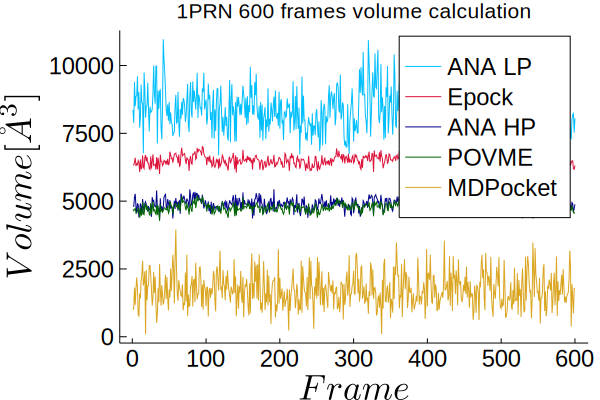

In [11]:
df_prn_vol = DataFrame(Volume = [ mdp_prn_vol ; pov_prn_vol ; epo_prn_vol;
    loprec_ana_prn_vol; hiprec_ana_prn_vol ],
    Frame = [ collect(1:600); collect(1:600); collect(1:600) ; collect(1:600) ; collect(1:600) ],
    Tool = repeat(["MDP" ; "POVME" ; "Epock"; "ANA:0"; "ANA:1"], inner=[length(hiprec_ana_prn_vol[:, 1])]));


plt_1prn_vol = plot(loprec_ana_prn_vol,
    lab = "ANA LP", linecolor = Colors.colorant"#00BFFF", linewidth = 1,
    title ="1PRN 600 frames volume calculation", xaxis = L"Frame", yaxis = L"Volume [\AA^3]",
    grid = false,
#     legend = false,
    guidefont = font(24, "Arial"), tickfont = font(16, "Arial"), legendfont = font(16, "Arial"))

plot!(plt_1prn_vol, epo_prn_vol, 
    lab = "Epock", linecolor = Colors.colorant"#DC143C", linewidth = 1)

plot!(plt_1prn_vol, hiprec_ana_prn_vol, 
    lab = "ANA HP", linecolor = Colors.colorant"#00008B", linewidth = 1)

plot!(plt_1prn_vol, pov_prn_vol, 
    lab = "POVME", linecolor = Colors.colorant"#006400", linewidth = 1)

plot!(plt_1prn_vol, mdp_prn_vol, 
    lab = "MDPocket", linecolor = Colors.colorant"#DAA520", linewidth = 1)

savefig(plt_1prn_vol, joinpath(dir_rtdos, "1prn_vol.svg"))
plt_1prn_vol

## Timings

In [5]:
# MDpocket
suma = 0
for i = 1:3
    proto = readdlm(joinpath(dir_1prn, "mdpocket/", string(i, "timing")))[1, 2]
    secs = ([60  1.] * map(x -> parse(Float64, x), split(proto[1:end-1], "m")))[1]
    suma += frame_cnt / secs
end
mdp_prn_rate = suma / 3

# POVME
suma = 0
for i = 1:1
    proto = readdlm(joinpath(dir_1prn, "povme/", string(i, "timing")))[1, 2]
    secs = ([60  1.] * map(x -> parse(Float64, x), split(proto[1:end-1], "m")))[1]
    suma += frame_cnt / secs
end
povme_prn_rate = suma / 3

# Epock
suma = 0
for i = 1:3
    proto = readdlm(joinpath(dir_1prn, "epock/", string(i, "timing")))[1, 2]
    secs = ([60  1.] * map(x -> parse(Float64, x), split(proto[1:end-1], "m")))[1]
    suma += frame_cnt / secs
end
epock_prn_rate = suma / 3

# ANA lo prec
suma = 0
for i = 1:3
    proto = readdlm(joinpath(dir_1prn, "ana/", string(i, "timing_loprec")))[1, 2]
    secs = ([60  1.] * map(x -> parse(Float64, x), split(proto[1:end-1], "m")))[1]
    suma += frame_cnt / secs
end
loana_prn_rate = suma / 3
# ANA hi prec
suma = 0
for i = 1:3
    proto = readdlm(joinpath(dir_1prn, "ana/", string(i, "timing_hiprec")))[1, 2]
    secs = ([60  1.] * map(x -> parse(Float64, x), split(proto[1:end-1], "m")))[1]
    suma += frame_cnt / secs
end
hiana_prn_rate = suma / 3;

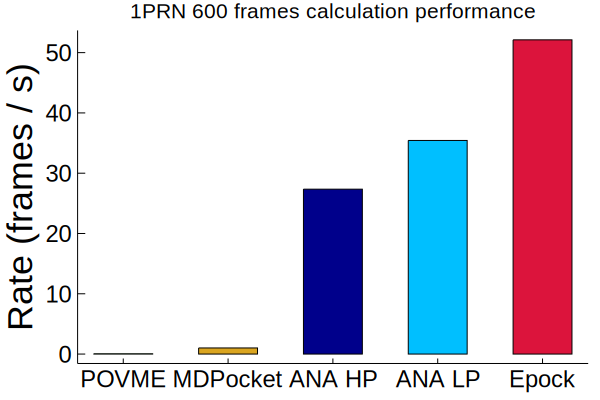

In [10]:
plt_1prn_time = bar(["POVME"], [povme_prn_rate],
    lab = "POVME", fillcolor = Colors.colorant"#006400",
    grid = false,
    legend = false,
    yaxis = "Rate (frames / s)", title = "1PRN 600 frames calculation performance",
    discrete_values = true,
    guidefont = font(24, "Arial"), tickfont = font(16, "Arial"),
    legendfont = font(16, "Arial"))

bar!(plt_1prn_time, ["MDPocket"], [mdp_prn_rate],
    lab = "MDPocket", fillcolor = Colors.colorant"#DAA520")

bar!(plt_1prn_time, ["ANA HP"], [hiana_prn_rate],
    lab = "ANA HP", fillcolor = Colors.colorant"#00008B")

bar!(plt_1prn_time, ["ANA LP"], [loana_prn_rate],
    lab = "ANA LP", fillcolor = Colors.colorant"#00BFFF")

bar!(plt_1prn_time, ["Epock"], [epock_prn_rate],
    lab = "Epock", fillcolor = Colors.colorant"#DC143C")

savefig(plt_1prn_time, joinpath(dir_rtdos, "1prn_time.svg"))
plt_1prn_time